In [2]:
# Run first line the first time
#using Pkg; Pkg.add("DataFrames"); Pkg.add("CSV"); Pkg.add("Dates");
using DataFrames
using CSV
using Plots
using Dates

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed GR_jll ────────────────── v0.66.0+0
   Installed OffsetArrays ──────────── v1.12.7
   Installed StaticArrays ──────────── v1.5.4
   Installed xkbcommon_jll ─────────── v1.4.1+0
   Installed HypergeometricFunctions ─ v0.3.11
   Installed NearestNeighbors ──────── v0.4.11
   Installed FFTW ──────────────────── v1.5.0
   Installed StaticArraysCore ──────── v1.1.0
   Installed PDMats ────────────────── v0.11.16
   Installed NaNMath ───────────────── v1.0.1
   Installed SpecialFunctions ──────── v2.1.7
   Installed StatsAPI ──────────────── v1.2.2
   Installed GLFW_jll ──────────────── v3.3.8+0
   Installed libaom_jll ────────────── v3.4.0+0
   Installed MbedTLS ───────────────── v1.1.3
   Installed StatsBase ─────────────── v0.33.21
   Installed AbstractFFTs ──────────── v1.2.1
   Installed Scratch ───────────────── v1.1.1
   Installed ColorTypes ────────────── v0.11.4
   Installed Ker

In [3]:
SPYdata = CSV.read("SPY2022.csv", DataFrame, normalizenames=true)
describe(SPYdata)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Date,,1999-12-31,,2022-08-15,0,Date
2,Open,183.972,67.95,142.33,479.22,0,Float64
3,High,185.07,70.0,143.1,479.98,0,Float64
4,Low,182.764,67.1,141.434,476.06,0,Float64
5,Close,183.979,68.11,142.215,477.71,0,Float64
6,Adj_Close,158.227,52.4101,107.908,474.182,0,Float64
7,Volume,1.09627e8,1436600,8.1471e7,871026300,0,Int64


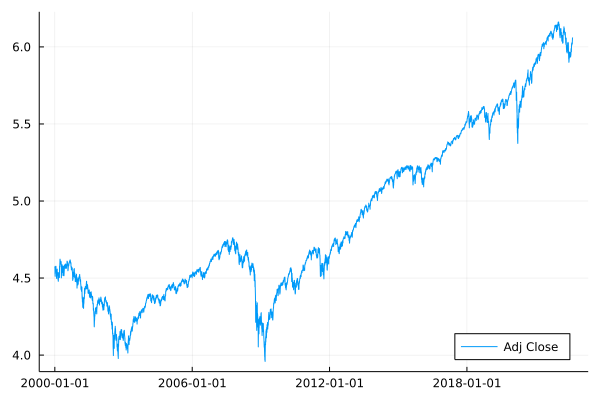

In [4]:
plot(SPYdata.Date, log.(SPYdata.Adj_Close), label = "Adj Close",legend=:bottomright)
#plot!(SPYdata.Date, log.(SPYdata.Close), label = "Close")

In [5]:
#compute returns
SPYdata.ret = 100.0 .* log.(SPYdata.Adj_Close ./ vcat(1,SPYdata.Adj_Close[1:end-1]) ) 

5692-element Vector{Float64}:
 457.5638579076751
  -0.9835269723301744
  -3.989142959549364
   0.17873146914005505
  -1.6202045116056891
   5.645229981493119
   0.3424679599446299
  -1.2037871900888777
  -0.9997975489377267
   1.345214534132934
   1.3486109185069224
  -0.7898143264406509
   0.811116821674486
   ⋮
   1.447347716617284
  -0.2965632566716042
  -0.6619202856787645
   1.5538151477207989
  -0.06758200434682274
  -0.16915860883486172
  -0.11616074805841158
  -0.397890717811121
   2.0786429459004165
   0.0
   1.6787314235590882
   0.41122984689818465

In [6]:
#We need to delete the first observation (which is not a return)
delete!(SPYdata, [1] ) 

,Date,Open,High,Low,Close,Adj_Close,Volume,ret
,Date,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,2000-01-03,148.25,148.25,143.875,145.438,96.1398,8164300,-0.983527
2,2000-01-04,143.531,144.062,139.641,139.75,92.3801,8089800,-3.98914
3,2000-01-05,139.938,141.531,137.25,140.0,92.5454,12177900,0.178731
4,2000-01-06,139.625,141.5,137.75,137.75,91.058,6227200,-1.6202
5,2000-01-07,140.312,145.75,140.062,145.75,96.3463,8066500,5.64523
6,2000-01-10,146.25,146.906,145.031,146.25,96.6769,5741700,0.342468
7,2000-01-11,145.812,146.094,143.5,144.5,95.5201,7503700,-1.20379
8,2000-01-12,144.594,144.594,142.875,143.062,94.5698,6907700,-0.999798
9,2000-01-13,144.469,145.75,143.281,145.0,95.8506,5158300,1.34521


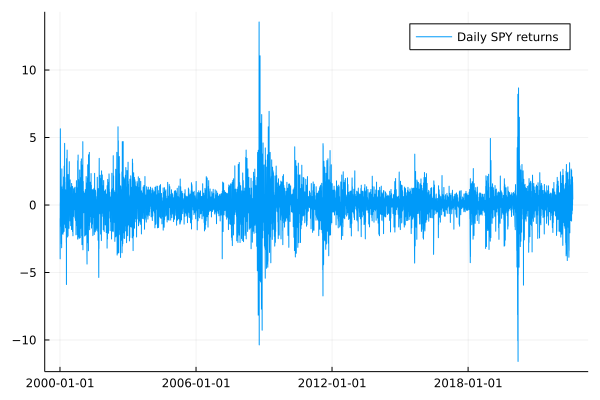

In [7]:
plot(SPYdata.Date, SPYdata.ret, label = "Daily SPY returns")

In [8]:
using Statistics
μ̂ = mean(SPYdata.ret)

0.02610247603739046

In [9]:
σ̂² = sum((SPYdata.ret .- μ̂).^2) / length(SPYdata.ret)

1.5530060259714626

In [18]:
√σ̂²
α = 0.05
α₁ = 0.05
α₂ = 0.05
β^2

4

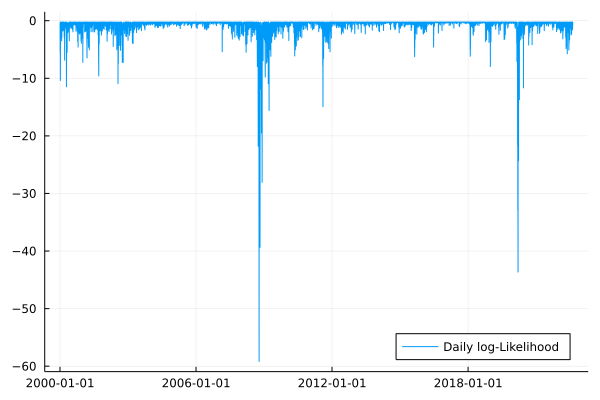

In [19]:
ℓ = - 0.5 .* ( (SPYdata.ret .- μ̂).^2 ./σ̂² .+ log(σ̂²) )
plot(SPYdata.Date, ℓ, label = "Daily log-Likelihood", legend =:bottomright)